# Data Preprocessing

In [338]:
import os
import statistics
import torch
import math
from Bio import SeqIO
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd
import re
from functools import reduce
import numpy as np

In [164]:
fasta_file = 'trna/trna.fa'

In [3]:
len(fasta_file)

12

In [4]:
n = 0 
for rec in SeqIO.parse(fasta_file, "fasta"):
    n+= 1

In [5]:
n

27818

In [309]:
trnas = []
fasta_file = 'trna/trna.fa'
for record, num in zip(SeqIO.parse(fasta_file, "fasta"), range(n)):
        trnas.append(str(record.seq).upper())
        #break
        #sequences[record.id] = str(record.seq)

random.seed(42)
random.shuffle(trnas)
trnas = trnas[:20000]
trnas= [re.sub(r'[^GCTAN]', 'N', s) for s in trnas]

In [310]:
#trnas

In [311]:
while('' in trnas):
    trnas.remove('')

In [312]:
#type(trnas)

In [313]:
maxi = max(len(s) for s in trnas)

In [314]:
maxi

601

In [315]:
min(len(s) for s in trnas)

54

In [316]:
avg = math.ceil(statistics.mean(len(s) for s in trnas))

In [317]:
for i,s in enumerate(trnas):
    if len(s) < avg:
        pad = avg- len(s)
        s += 'N' * pad
        trnas[i] = s
    elif len(s) > avg:
        s = s[:avg]
        trnas[i] = s

In [318]:
trnas
df = pd.DataFrame(trnas)
df.to_clipboard(index=False,header=False)

In [319]:
N = torch.zeros((avg, 5),  dtype = torch.int32)

In [320]:
bases = ['A','T','C','G','N']

In [321]:
stoi = {'A': 0, 'T': 1, 'C':2, 'G':3, 'N':4}
itos = {i:s for s,i in stoi.items()}

In [322]:
for seq in trnas:
    for i, b in enumerate(seq):
        ix2 = i # the row number
        ix1 = stoi[b]
        N[ix2][ix1] += 1

In [323]:
N = N+1

In [ ]:
plt.figure(figsize = (50,50))
plt.imshow(N, cmap = 'Reds')
for i in range(5):
    for j in range(avg):
        plt.text(i, j, itos[i], ha = 'center', va = 'bottom', color = 'gray') #horizontal and vertical alognments
        plt.text(i, j, N[j, i].item(), ha = 'center', va = 'top', color = 'gray') # the count at the bottom
plt.axis('off');



In [325]:
P = N.float() #N are the counts from the gra
P /= P.sum(1, keepdims = True) 

In [326]:
P

tensor([[4.6702e-02, 9.0243e-02, 1.0534e-02, 8.5137e-01, 1.1537e-03],
        [6.3506e-02, 7.1833e-02, 9.8420e-02, 7.6564e-01, 6.0196e-04],
        [9.3353e-02, 1.0389e-01, 1.1728e-01, 6.8513e-01, 3.5114e-04],
        [6.1450e-02, 1.0875e-01, 2.2182e-01, 6.0783e-01, 1.5049e-04],
        [2.7364e-01, 1.3343e-01, 1.1317e-01, 4.7971e-01, 5.0163e-05],
        [1.2666e-01, 5.4507e-01, 1.3323e-01, 1.9488e-01, 1.5049e-04],
        [3.3158e-01, 1.8575e-01, 4.8558e-02, 4.3401e-01, 1.0033e-04],
        [6.8723e-02, 8.2483e-01, 4.4244e-02, 6.2052e-02, 1.5049e-04],
        [6.0908e-01, 9.8972e-02, 2.8844e-02, 2.6305e-01, 5.0163e-05],
        [8.0161e-02, 5.5731e-02, 2.9646e-02, 8.3441e-01, 5.0163e-05],
        [3.6218e-02, 1.8159e-01, 6.8242e-01, 9.9674e-02, 1.0033e-04],
        [4.8758e-02, 6.5794e-01, 1.3178e-01, 1.6147e-01, 5.0163e-05],
        [3.9629e-02, 2.5493e-01, 6.2784e-01, 7.7552e-02, 5.0163e-05],
        [8.1264e-01, 5.4176e-02, 7.6499e-02, 5.6634e-02, 5.0163e-05],
        [1.8530e-01,

In [327]:
P.shape

torch.Size([78, 5])

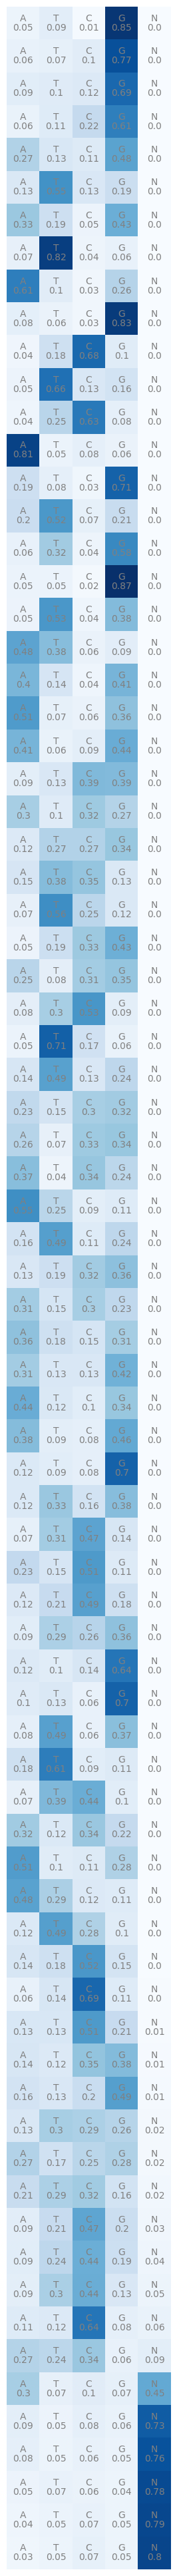

In [328]:
plt.figure(figsize = (50,50))
plt.imshow(P, cmap = 'Blues')
for i in range(5):
    for j in range(avg):
        plt.text(i, j, itos[i], ha = 'center', va = 'bottom', color = 'gray') #horizontal and vertical alognments
        plt.text(i, j, round(P[j, i].item(),2), ha = 'center', va = 'top', color = 'gray') # the count at the bottom
plt.axis('off');

# Training the model

In [329]:
trna_avgs = []
for seq in trnas:
    m = 0
    for row, base in enumerate(seq):
        col = stoi[base]
        m += P[row][col]
    trna_avgs.append(m/avg)
        
        
    


In [335]:
#trna_avgs

In [331]:
sum = reduce(lambda x, y: x+y, trna_avgs)

In [332]:
sum.item()/len(trna_avgs)

0.40368249321845207

In [333]:
min(trna_avgs).item()

0.18539291620254517

(array([ 101.,  699., 1555., 2001., 1676., 1042., 1641., 2130., 4897.,
        4188.]),
 array([0.18539292, 0.21797973, 0.25056654, 0.28315333, 0.31574014,
        0.34832695, 0.38091376, 0.41350058, 0.44608736, 0.47867417,
        0.51126099]),
 <BarContainer object of 10 artists>)

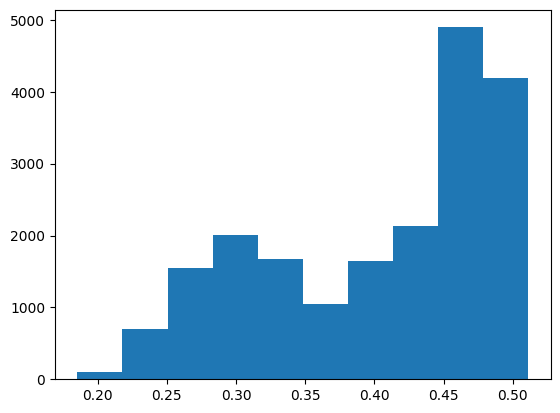

In [334]:
plt.hist(trna_avgs)

# Testing the model

In [344]:
threshold = min(trna_avgs).item()

testing_yes = trnas[-100:]
testing_yes = [(s, 1) for s in trnas] 




In [346]:
testing_no = []
for _ in range(100):
    np_values = np.asarray(['A', 'T', 'C', 'G'])
    np_count = np.asarray([1, 1, 1, 1])
    np_urn = np.repeat(np_values, np_count)
    N = avg
    sequence = np.random.choice(np_urn, size=N, p=None, replace=True)
    sequence = ''.join(sequence)
    testing_no.append((sequence, 0))
